In [256]:
# Importing neccessary libraries for now
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [257]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/(1)Bike_Price_Prediction(1).csv')

In [259]:

df.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [260]:
df.shape

(308, 10)

In [261]:
#Printing all columns to check
print('Attributes in the dataset: ', df.columns.values)

Attributes in the dataset:  ['S.no' 'Bike_company' 'Bike_model' 'Manufactured_year' 'Engine_warranty'
 'Engine_type' 'Fuel_type' 'CC(Cubic capacity)' 'Fuel_Capacity' 'Price']


In [262]:
df.describe(include='all')

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
count,308.000000,308,308,308.000000,306.000000,308,308,308,307,3.080000e+02
unique,NaN,25,237,NaN,NaN,6,2,73,27,NaN
top,NaN,Suzuki,Bullet,NaN,NaN,Boxer,Petrol,150CC,Battery,NaN
freq,NaN,20,6,NaN,NaN,97,258,25,40,NaN
mean,154.496753,NaN,NaN,2010.847403,6.032680,NaN,NaN,NaN,NaN,2.548416e+05
std,89.059088,NaN,NaN,104.747343,3.719542,NaN,NaN,NaN,NaN,2.950174e+05
min,1.000000,NaN,NaN,202.000000,2.000000,NaN,NaN,NaN,NaN,5.000000e+04
25%,77.750000,NaN,NaN,2017.000000,4.000000,NaN,NaN,NaN,NaN,7.500000e+04
50%,154.500000,NaN,NaN,2019.000000,5.000000,NaN,NaN,NaN,NaN,1.045000e+05
75%,231.250000,NaN,NaN,2020.000000,8.000000,NaN,NaN,NaN,NaN,3.412500e+05


In [263]:
#We can see null values in many columns and many columns have irregular data causing the data to be seen as above.
#We need no make these changes

In [264]:
# Data Rectification

In [265]:
# remove the serial number column that will no used for the analysis from the dataset
df.drop(columns=['S.no'], axis=1, inplace=True)

In [266]:
# strip the unit of measurement from the values in columns 'Cubic_Capacity' & 'Fuel_Capacity'
df['CC(Cubic capacity)'] = df['CC(Cubic capacity)'].str.replace('CC','')
df['Fuel_Capacity'] = df['Fuel_Capacity'].str.replace('Litres','')

In [267]:
df.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140,12,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14,65000


In [268]:
#Renaming CC(Cubic capacity) for easier usage
df.rename({'CC(Cubic capacity)':'Cubic_capacity'}, axis=1, inplace=True)

In [269]:
### Exploratory Analysis to see what features are relevant(drop/notdrop), the type of variables we have(categorical/continuos)
# get dummies(if needed),correlevance b/w features

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bike_company       308 non-null    object 
 1   Bike_model         308 non-null    object 
 2   Manufactured_year  308 non-null    int64  
 3   Engine_warranty    306 non-null    float64
 4   Engine_type        308 non-null    object 
 5   Fuel_type          308 non-null    object 
 6   Cubic_capacity     308 non-null    object 
 7   Fuel_Capacity      307 non-null    object 
 8   Price              308 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 21.8+ KB


In [271]:
#Going to use CC nad Fuel capacity. Therefore need to be converted to integers/numericals
df['Cubic_capacity'] = pd.to_numeric(df['Cubic_capacity'], errors='coerce')
df['Fuel_Capacity'] = pd.to_numeric(df['Fuel_Capacity'], errors='coerce')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bike_company       308 non-null    object 
 1   Bike_model         308 non-null    object 
 2   Manufactured_year  308 non-null    int64  
 3   Engine_warranty    306 non-null    float64
 4   Engine_type        308 non-null    object 
 5   Fuel_type          308 non-null    object 
 6   Cubic_capacity     308 non-null    int64  
 7   Fuel_Capacity      267 non-null    float64
 8   Price              308 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.8+ KB


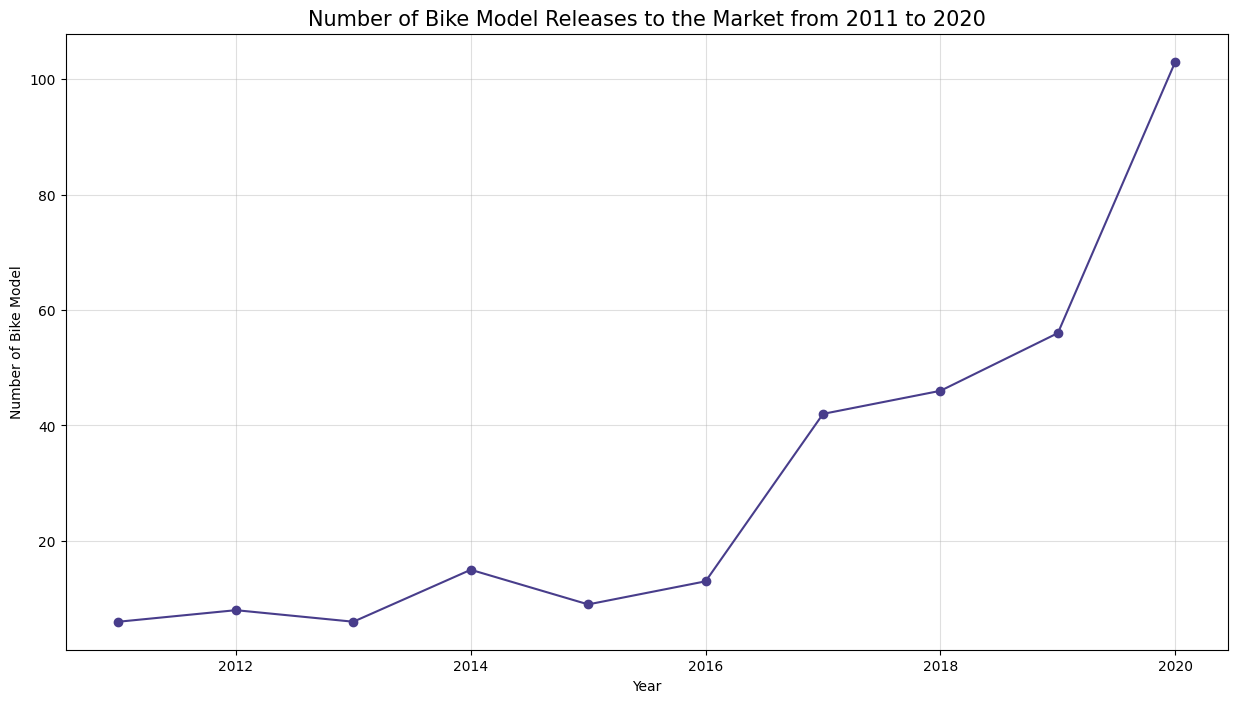

In [273]:
#Finding out the year that saw the highest number of bike releases to the market
man_year = df['Manufactured_year'].value_counts()
# there are 4 incorrect data: [1840, 202, 2050, 1790]
# exclude these data from the analysis
man_year_fil = man_year[:10].sort_index()

plt.figure(figsize=(15,8))
plt.plot(man_year_fil.index, man_year_fil.values, color='darkslateblue', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Bike Model')
plt.title('Number of Bike Model Releases to the Market from 2011 to 2020', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

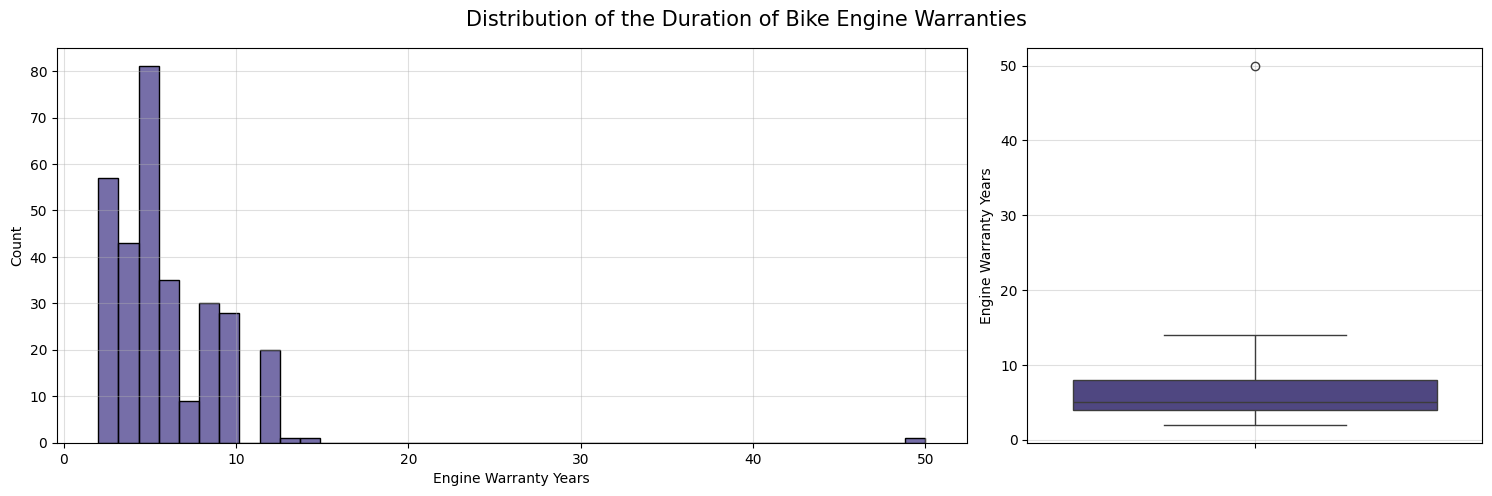

,Engine_warranty
count,306.000000
mean,6.032680
std,3.719542
min,2.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,50.000000


In [274]:
#Finding out the average duration of engine warranties in the dataset to check for outliers if any
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['Engine_warranty'], ax=axes[0], color='darkslateblue')
axes[0].set_xlabel('Engine Warranty Years')
axes[0].grid(alpha=0.4)
sns.boxplot(data=df, y=df['Engine_warranty'], ax=axes[1], color='darkslateblue')
axes[1].set_ylabel('Engine Warranty Years')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of the Duration of Bike Engine Warranties', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

display(df.Engine_warranty.describe())


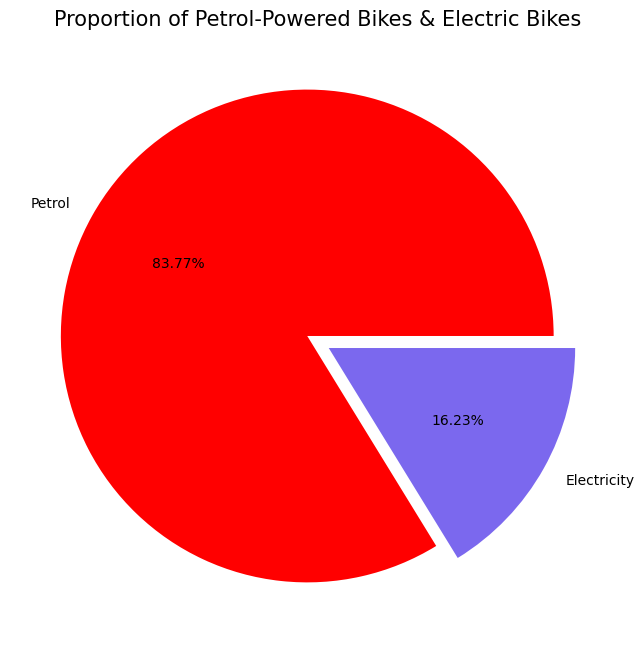

In [275]:
#Ratio of battery powerd vehicles to IC engines
fueltype = df['Fuel_type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(fueltype.values, labels=fueltype.index, autopct='%.2f%%', colors=['Red','mediumslateblue'], explode=([0.05]*len(fueltype.index)))
plt.title('Proportion of Petrol-Powered Bikes & Electric Bikes', fontsize=15)
plt.show()

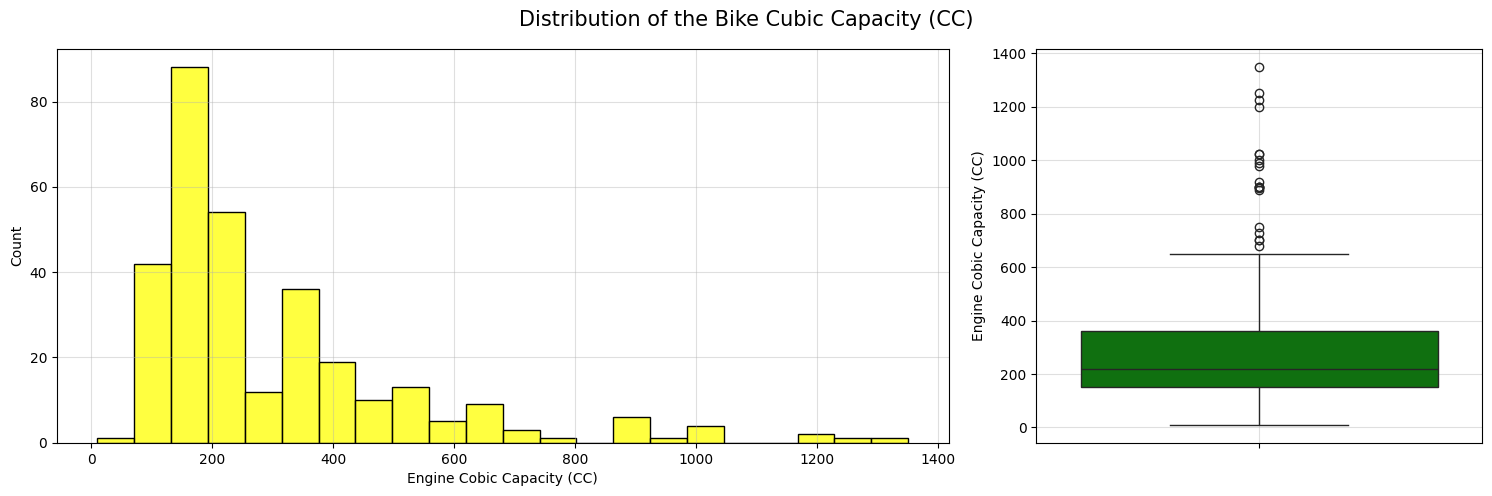

,Cubic_capacity
count,308.000000
mean,301.902597
std,222.733778
min,10.000000
25%,150.000000
50%,220.000000
75%,360.000000
max,1350.000000


In [276]:
# Finding out the average cubic capacity of bikes(CC) to check data consistency/sense
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['Cubic_capacity'], ax=axes[0], color='yellow')
axes[0].set_xlabel('Engine Cobic Capacity (CC)')
axes[0].grid(alpha=0.4)
sns.boxplot(data=df, y=df['Cubic_capacity'], ax=axes[1], color='green')
axes[1].set_ylabel('Engine Cobic Capacity (CC)')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of the Bike Cubic Capacity (CC)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

display(df.Cubic_capacity.describe())

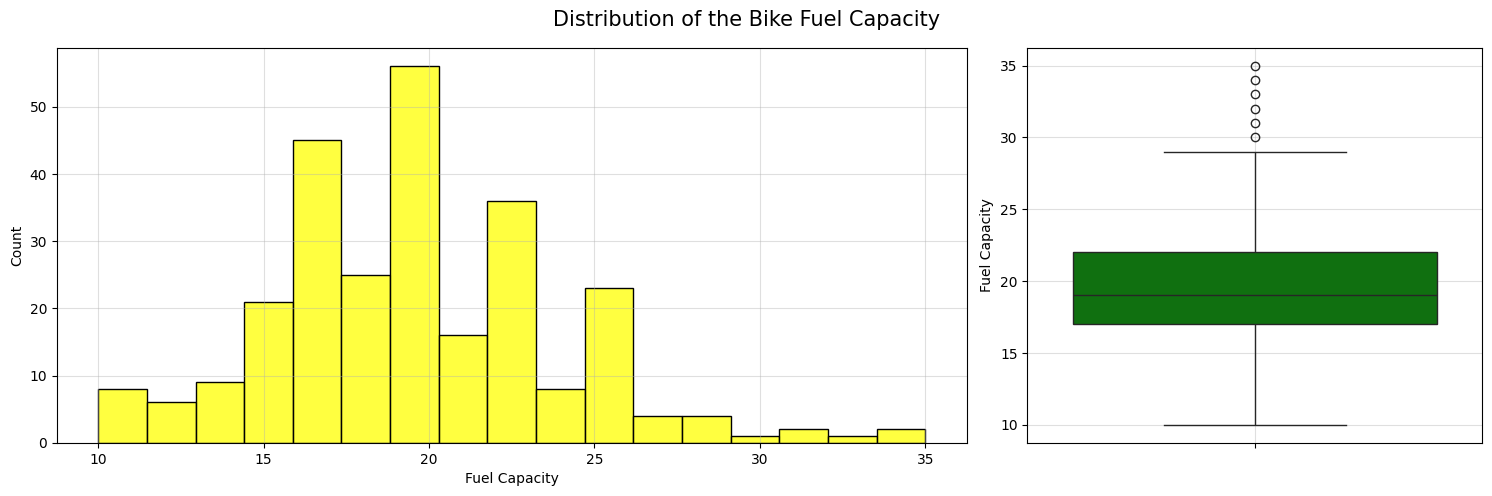

,Fuel_Capacity
count,267.000000
mean,19.520599
std,4.356586
min,10.000000
25%,17.000000
50%,19.000000
75%,22.000000
max,35.000000


In [277]:
# Finding out the average Fuel Capacity(Litres) to check data consistency/sense
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['Fuel_Capacity'], ax=axes[0], color='yellow')
axes[0].set_xlabel('Fuel Capacity')
axes[0].grid(alpha=0.4)
sns.boxplot(data=df, y=df['Fuel_Capacity'], ax=axes[1], color='green')
axes[1].set_ylabel('Fuel Capacity')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of the Bike Fuel Capacity', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

display(df.Fuel_Capacity.describe())


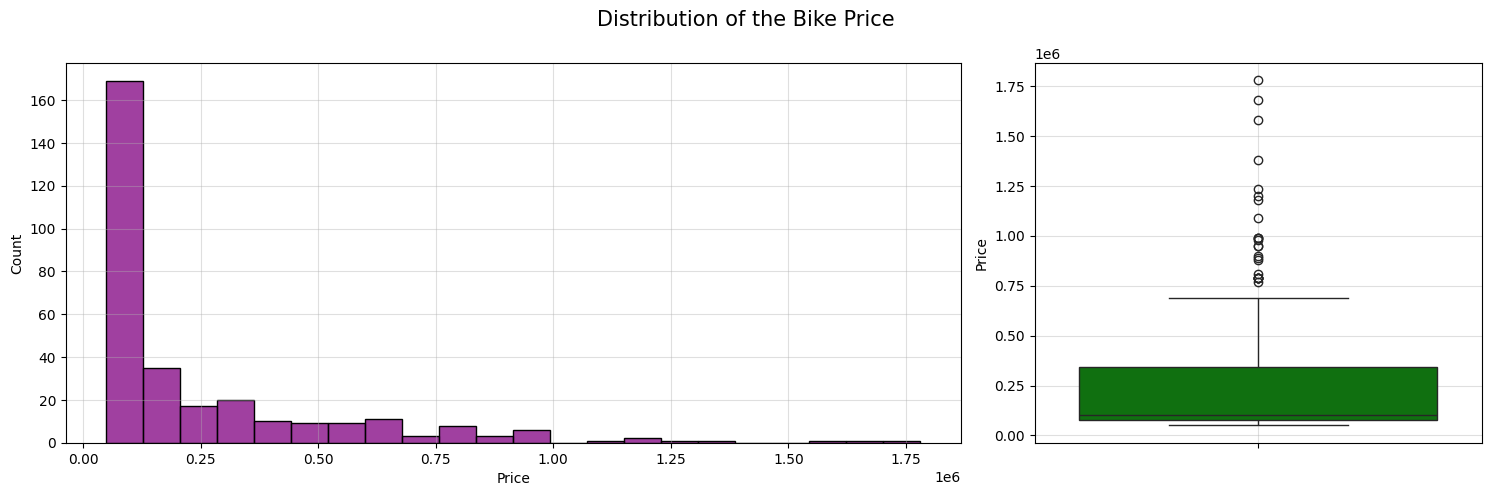

,Price
count,3.080000e+02
mean,2.548416e+05
std,2.950174e+05
min,5.000000e+04
25%,7.500000e+04
50%,1.045000e+05
75%,3.412500e+05
max,1.779990e+06


In [278]:
#Finding out avaerage price of bikes in the data. Exceedingly high prices can cause misleading models and accuracy(outlier prices)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df, x=df['Price'], ax=axes[0], color='Purple')
axes[0].set_xlabel('Price')
axes[0].grid(alpha=0.4)
sns.boxplot(data=df, y=df['Price'], ax=axes[1], color='green')
axes[1].set_ylabel('Price')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of the Bike Price', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

display(df.Price.describe())


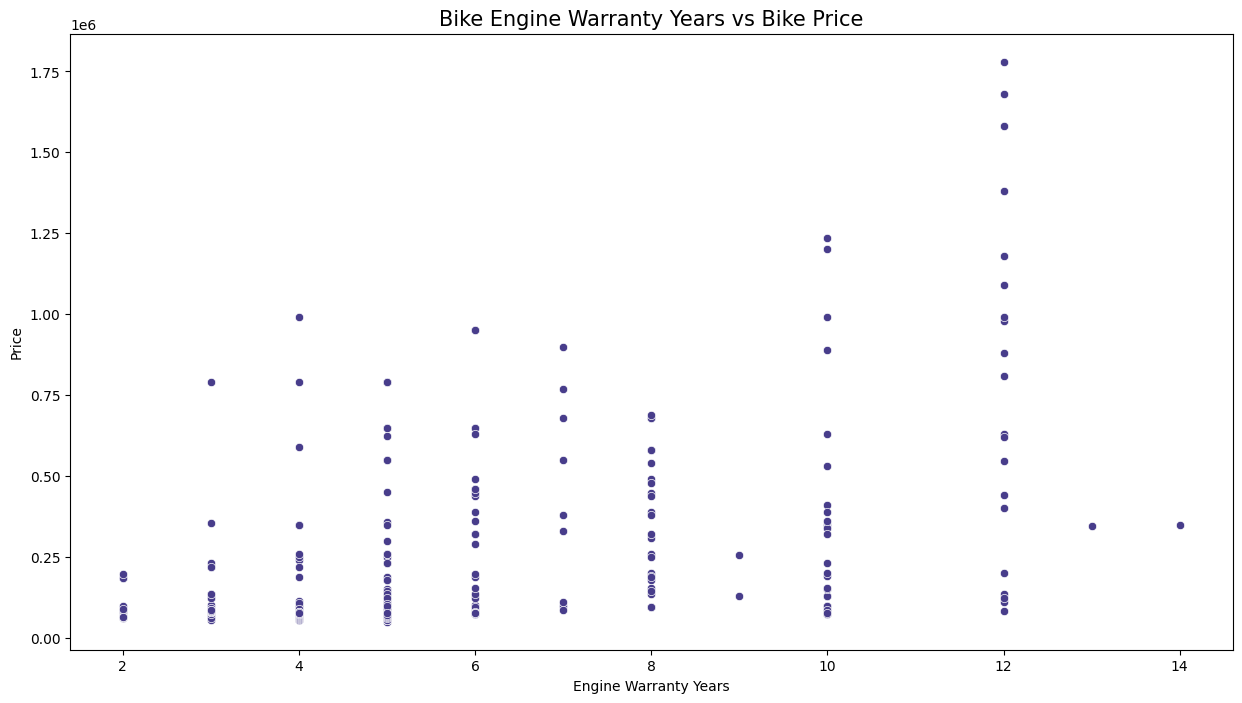

In [279]:
#Checking Corelation between variables
# Price Vs Engine Warranty
fil_df = df[df['Engine_warranty']<20]     #------We are excluding outliers here itself

plt.figure(figsize=(15,8))
sns.scatterplot(data=fil_df, x=fil_df['Engine_warranty'], y=fil_df['Price'], color='darkslateblue')
plt.xlabel('Engine Warranty Years')
plt.ylabel('Price')
plt.title('Bike Engine Warranty Years vs Bike Price', fontsize=15)
plt.show()

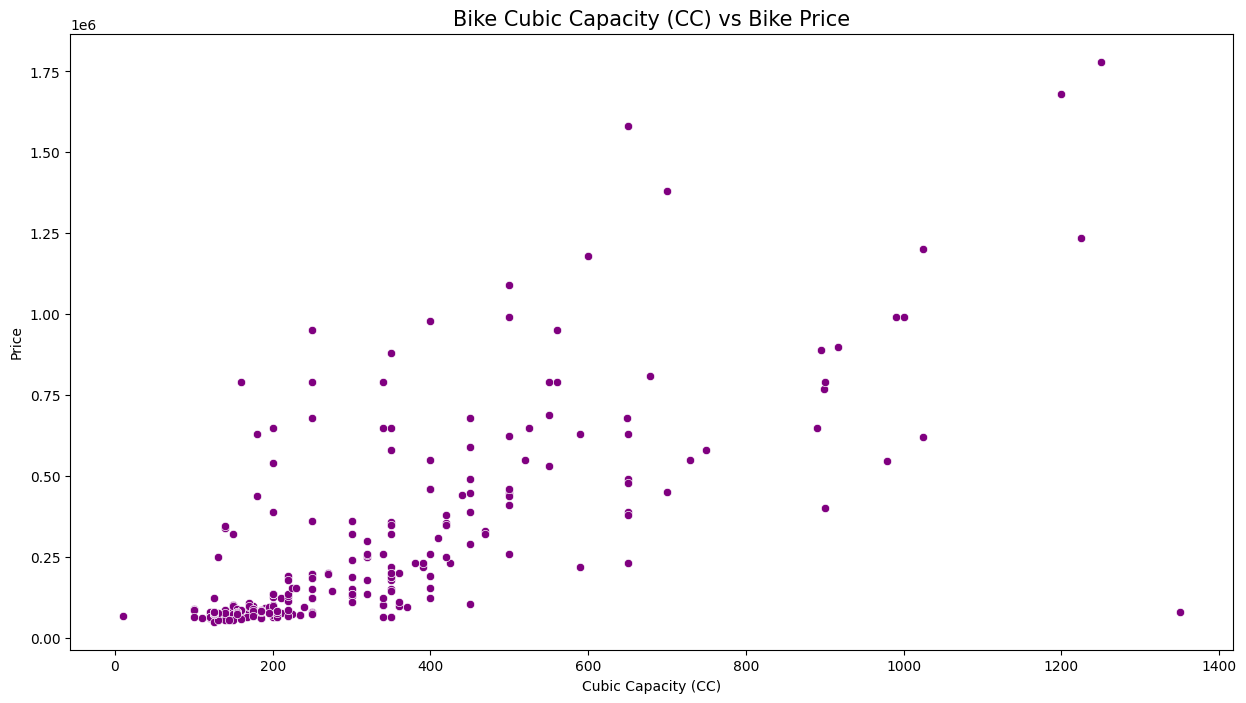

In [280]:
#Price Vs Cubic Capacity
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x=df['Cubic_capacity'], y=df['Price'], color='Purple')
plt.xlabel('Cubic Capacity (CC)')
plt.ylabel('Price')
plt.title('Bike Cubic Capacity (CC) vs Bike Price', fontsize=15)
plt.show()

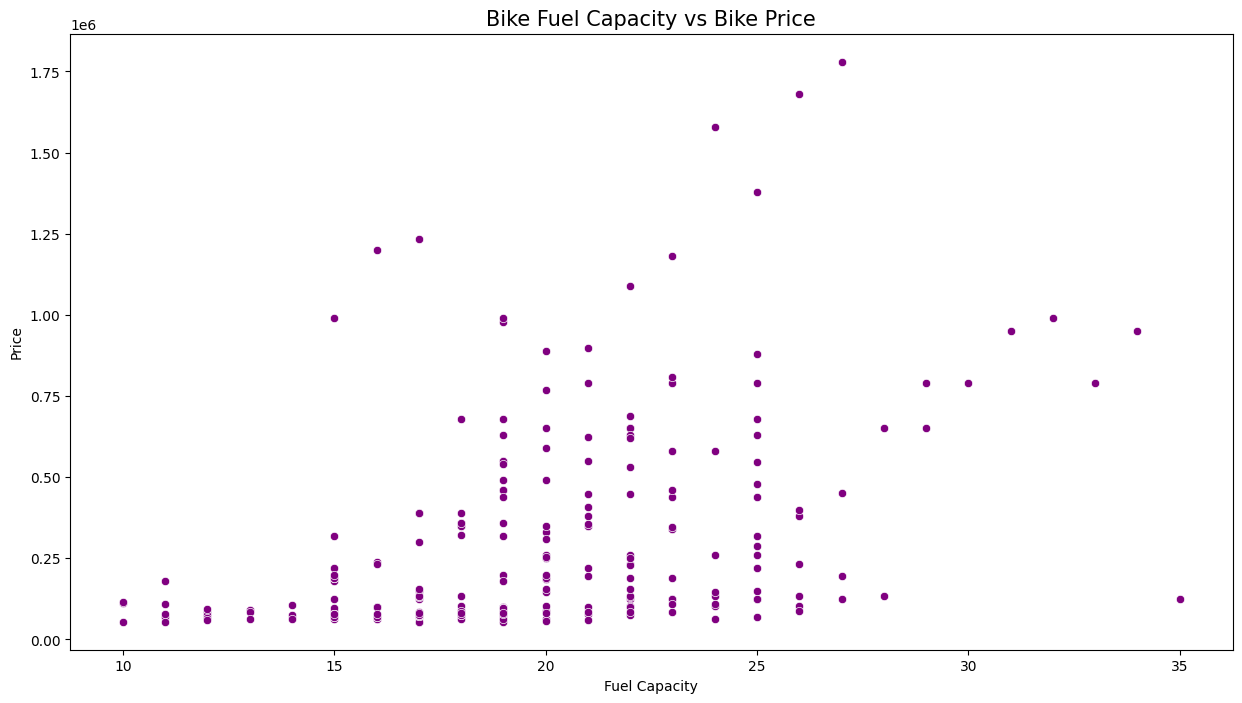

In [281]:
#Price Vs Fuel Capacity
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x=df['Fuel_Capacity'], y=df['Price'], color='Purple')
plt.xlabel('Fuel Capacity')
plt.ylabel('Price')
plt.title('Bike Fuel Capacity vs Bike Price', fontsize=15)
plt.show()

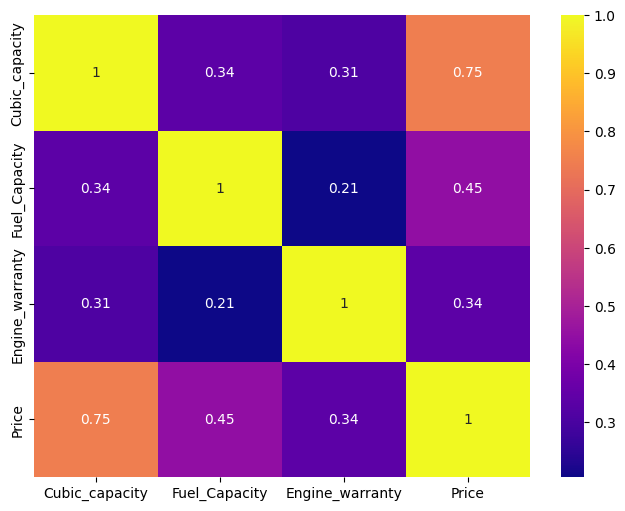

In [282]:
#Price Vs CC,Fuel capacity,engine warranty
fil_data = df[['Cubic_capacity','Fuel_Capacity','Engine_warranty','Price']]

# calculate the Pearson's correlation
correlation = fil_data.corr()

# visualize the correlation in heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='plasma')
plt.show()

In [283]:
# exclude attributes that will no use in regression analysis
df = df.drop(columns=['Bike_company','Bike_model','Manufactured_year'], axis=1)
df.head()

,Engine_warranty,Engine_type,Fuel_type,Cubic_capacity,Fuel_Capacity,Price
0,5.0,Single,Petrol,220,10.0,113000
1,5.0,V-twin,Petrol,120,11.0,70000
2,5.0,Boxer,Petrol,140,12.0,85000
3,5.0,Single,Petrol,150,13.0,90000
4,5.0,V-twin,Petrol,350,14.0,65000


In [284]:
# Checking for null values in each column
null_counts = df.isnull().sum()
print(null_counts)

Engine_warranty     2
Engine_type         0
Fuel_type           0
Cubic_capacity      0
Fuel_Capacity      41
Price               0
dtype: int64


In [285]:
# Replace null values in 'Engine_type' with the mean of the column
df['Engine_warranty'].fillna(df['Engine_warranty'].mean(), inplace=True)

In [286]:
df.head(20)

,Engine_warranty,Engine_type,Fuel_type,Cubic_capacity,Fuel_Capacity,Price
0,5.0,Single,Petrol,220,10.0,113000
1,5.0,V-twin,Petrol,120,11.0,70000
2,5.0,Boxer,Petrol,140,12.0,85000
3,5.0,Single,Petrol,150,13.0,90000
4,5.0,V-twin,Petrol,350,14.0,65000
5,5.0,Boxer,Petrol,350,15.0,180000
6,5.0,Single,Petrol,150,16.0,65000
7,5.0,V-twin,Petrol,300,17.0,150000
8,5.0,Boxer,Petrol,100,18.0,89000
9,5.0,Single,Petrol,170,19.0,99999


In [287]:
# Replace null values in 'Fuel_Capacity' with 0
df['Fuel_Capacity'].fillna(0, inplace=True)

In [288]:
df.head(20)

,Engine_warranty,Engine_type,Fuel_type,Cubic_capacity,Fuel_Capacity,Price
0,5.0,Single,Petrol,220,10.0,113000
1,5.0,V-twin,Petrol,120,11.0,70000
2,5.0,Boxer,Petrol,140,12.0,85000
3,5.0,Single,Petrol,150,13.0,90000
4,5.0,V-twin,Petrol,350,14.0,65000
5,5.0,Boxer,Petrol,350,15.0,180000
6,5.0,Single,Petrol,150,16.0,65000
7,5.0,V-twin,Petrol,300,17.0,150000
8,5.0,Boxer,Petrol,100,18.0,89000
9,5.0,Single,Petrol,170,19.0,99999


In [290]:
#To convert categorical variable columns such as 'Engine_type' and 'Fuel_Type' to numerical variables using  binary

# Create dummy variables for 'Engine_type' and 'Fuel_Type'
df = pd.get_dummies(df, columns=['Engine_type','Fuel_type'], prefix=['Engine','Fuel'], drop_first=True)

# Now, 'Engine_type' and 'Fuel_Type' have been replaced with binary numerical variables.
print(df.head())

   Engine_warranty  Cubic_capacity  Fuel_Capacity   Price  Engine_Dual Stroke  \
0              5.0             220           10.0  113000               False   
1              5.0             120           11.0   70000               False   
2              5.0             140           12.0   85000               False   
3              5.0             150           13.0   90000               False   
4              5.0             350           14.0   65000               False   

   Engine_Oxidiser-Air inlet  Engine_Single  Engine_Two-Stroke  Engine_V-twin  \
0                      False           True              False          False   
1                      False          False              False           True   
2                      False          False              False          False   
3                      False           True              False          False   
4                      False          False              False           True   

   Fuel_Petrol  
0        

In [291]:
#Will be Multiple Linear regression model. Hence am classifying all columns other than 'Price' as features or independent variables and assign 'Price' as the dependent variable(The one we will predict)

# Define features (X) and target (y)
X = df.drop('Price', axis=1)  # All columns except 'Price' are features
y = df['Price']  # 'Price' is the target variable


In [292]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (246, 9)
X_test shape: (62, 9)
y_train shape: (246,)
y_test shape: (62,)


In [294]:
#Running Multiple linear regression on the above dataframe with the defined X and y and check various parameters(mse,r2,adjusted r2,RMSE) of model feasibilty and accuracy

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 26709385451.16
R-squared (R2): 0.59
Adjusted R-squared: 0.51
Root Mean Squared Error (RMSE): 163430.06


In [ ]:
#RMSE value is 1 Lakh 63 thousand. This may be due to bikes priced extremely high in the dataset.This may cause this. If we drop those, we may
#get a lesser RMSE. Or we cluster the bikes less than 10 lakhs in price and make a model for that .

#That itself could be a different model